In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 30','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34','column 35','column 36','column 37','column 38','column 39','column 40','column 41','column 42','column 43','column 44','column 45','column 46','column 47','column 48','column 49','column 50','column 51','column 52','column 53','column 54','column 55','column 56','column 57','column 58','column 59','column 60']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Sonar\Sonar_AN_10.xlsx.', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,NaN,0.0168,NaN,0.0393,0.1630,0.2028,0.1694,NaN,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
205,0.0522,NaN,0.0180,NaN,0.0351,0.1171,0.1257,0.1178,NaN,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	0
float64		column 2	20
float64		column 3	0
float64		column 4	20
float64		column 5	0
float64		column 6	0
float64		column 7	0
float64		column 8	0
float64		column 9	40
float64		column 10	0
float64		column 11	40
float64		column 12	0
float64		column 13	40
float64		column 14	40
float64		column 15	20
float64		column 16	20
float64		column 17	40
float64		column 18	40
float64		column 19	40
float64		column 20	40
float64		column 21	40
float64		column 22	40
float64		column 23	20
float64		column 30	40
float64		column 25	40
float64		column 26	40
float64		column 27	20
float64		column 28	40
float64		column 29	0
float64		column 30	40
float64		column 31	0
float64		column 32	40
float64		column 33	40
float64		column 34	0
float64		column 35	40
float64		column 36	40
float64		column 37	40
float64		column 38	40
float64		column 39	0
float64		column 40	20
float64		column 41	0
float64		column 42	20
float64		column 43	20
float64		column 44	20
float64		column 

In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
count,208.000000,188.000000,208.000000,188.000000,208.000000,208.000000,208.000000,208.000000,168.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038827,0.043832,0.054238,0.075202,0.104570,0.121747,0.134799,0.178140,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.033591,0.038428,0.047563,0.055552,0.059105,0.061788,0.085152,0.124287,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016575,0.018950,0.024475,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.029550,0.034300,0.043600,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.050900,0.057950,0.062850,0.100275,0.134125,0.154000,0.169600,0.224375,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


<AxesSubplot:>

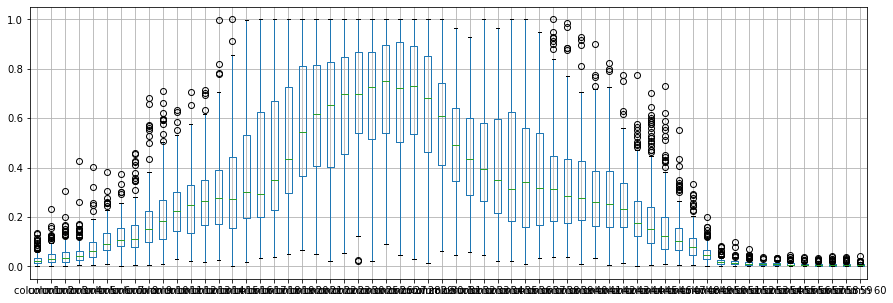

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.029164
column 2       0.038827
column 3       0.043832
column 4       0.054238
column 5       0.075202
column 6       0.104570
column 7       0.121747
column 8       0.134799
column 9       0.178140
column 10      0.208259
column 11      0.235883
column 12      0.250221
column 13      0.277658
column 14      0.296210
column 15      0.312928
column 16      0.373929
column 17      0.398749
column 18      0.442711
column 19      0.500557
column 20      0.567391
column 21      0.610582
column 22      0.622323
column 23      0.649541
column 30      0.668216
column 25      0.668524
column 26      0.694333
column 27      0.696315
column 28      0.690107
column 29      0.642074
column 30.1    0.581740
column 31      0.504475
column 32      0.447499
column 33      0.430178
column 34      0.403233
column 35      0.398896
column 36      0.396685
column 37      0.372640
column 38      0.351649
column 39      0.325800
column 40      0.313473
column 41      0.289252
column 42      0

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
column 1,1.000000,0.739605,0.571537,0.504277,0.344797,0.238921,0.260815,0.355523,0.367980,0.318276,...,0.254450,0.355299,0.311729,0.322299,0.312067,0.220642,0.313725,0.368132,0.357116,0.347078
column 2,0.739605,1.000000,0.774275,0.599736,0.419611,0.363611,0.304897,0.341664,0.321847,0.291811,...,0.321206,0.440553,0.332217,0.394498,0.382070,0.261631,0.280659,0.344583,0.356778,0.340387
column 3,0.571537,0.774275,1.000000,0.778378,0.546141,0.346275,0.190434,0.237884,0.263498,0.219637,...,0.238110,0.394076,0.332914,0.367186,0.289731,0.287661,0.380819,0.334108,0.425047,0.373948
column 4,0.504277,0.599736,0.778378,1.000000,0.730969,0.362679,0.261074,0.251660,0.255524,0.262069,...,0.170425,0.389615,0.347271,0.333755,0.270550,0.277458,0.357158,0.346347,0.421506,0.390404
column 5,0.344797,0.419611,0.546141,0.730969,1.000000,0.597053,0.335422,0.204006,0.181103,0.183219,...,0.115936,0.266617,0.314985,0.205306,0.196472,0.199323,0.219395,0.238793,0.290982,0.253710
column 6,0.238921,0.363611,0.346275,0.362679,0.597053,1.000000,0.702889,0.471683,0.359963,0.288621,...,0.171767,0.252288,0.162404,0.164073,0.133464,0.166758,0.161333,0.203986,0.220573,0.178158
column 7,0.260815,0.304897,0.190434,0.261074,0.335422,0.702889,1.000000,0.675774,0.498948,0.425448,...,0.184152,0.144051,0.046403,0.163074,0.195541,0.174143,0.186324,0.242646,0.183578,0.222493
column 8,0.355523,0.341664,0.237884,0.251660,0.204006,0.471683,0.675774,1.000000,0.794129,0.652525,...,0.260692,0.219038,0.102447,0.234008,0.239551,0.276819,0.267212,0.287603,0.194400,0.146216
column 9,0.367980,0.321847,0.263498,0.255524,0.181103,0.359963,0.498948,0.794129,1.000000,0.891537,...,0.147494,0.172652,0.079039,0.184320,0.202557,0.287877,0.241150,0.233100,0.130935,0.131438
column 10,0.318276,0.291811,0.219637,0.262069,0.183219,0.288621,0.425448,0.652525,0.891537,1.000000,...,0.167096,0.165537,0.097544,0.146725,0.175254,0.151889,0.140327,0.212277,0.058273,0.097358


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [60,60+14,60+14+14,60+14+14+14,60+14+14,60+14,60], vae_layer = False, seed = 140)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [60]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 16.46544023660513
Epoch: 1 , loss: 16.267986591045673
Epoch: 2 , loss: 16.17817049760085
Epoch: 3 , loss: 16.07968704517071
Epoch: 4 , loss: 15.960980121905987
Epoch: 5 , loss: 15.934957284193773
Epoch: 6 , loss: 15.82909606053279
Epoch: 7 , loss: 15.816462956942045
Epoch: 8 , loss: 15.696657547583946
Epoch: 9 , loss: 15.610988837022047
Epoch: 10 , loss: 15.502132929288424
Epoch: 11 , loss: 15.322444622333233
Epoch: 12 , loss: 15.177839205815243
Epoch: 13 , loss: 14.971015783456656
Epoch: 14 , loss: 14.662833067087027
Epoch: 15 , loss: 14.231112040006197
Epoch: 16 , loss: 13.749576275165264
Epoch: 17 , loss: 12.942334908705492
Epoch: 18 , loss: 12.081376222463755
Epoch: 19 , loss: 11.018921852111816
Epoch: 20 , loss: 9.90817172710712
Epoch: 21 , loss: 9.229881800138033
Epoch: 22 , loss: 8.960310055659367
Epoch: 23 , loss: 8.740642877725454
Epoch: 24 , loss: 8.509648909935585
Epoch: 25 , loss: 8.3651305

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(208, 60)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1       0.0664
column 2       0.0575
column 3       0.0842
column 4       0.0372
column 5       0.0458
column 6       0.0771
column 7       0.0771
column 8       0.1130
column 9       0.2353
column 10      0.1838
column 11      0.2869
column 12      0.4129
column 13      0.3647
column 14      0.1984
column 15      0.2840
column 16      0.4039
column 17      0.5837
column 18      0.6792
column 19      0.6086
column 20      0.4858
column 21      0.3246
column 22      0.2013
column 23      0.2082
column 30      0.1686
column 25      0.2484
column 26      0.2736
column 27      0.2984
column 28      0.4655
column 29      0.6990
column 30.1    0.7474
column 31      0.7956
column 32      0.7981
column 33      0.6715
column 34      0.6942
column 35      0.7440
column 36      0.8169
column 37      0.8912
column 38      1.0000
column 39      0.8753
column 40      0.7061
column 41      0.6803
column 42      0.5898
column 43      0.4618
column 44      0.3639
column 45      0.1492
column 46 

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Sonar.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0,-0.012606,0.0,0.012670,0.0,0.0,0.0,0.0,-0.145768,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
204,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
205,0.0,-0.013403,0.0,0.010691,0.0,0.0,0.0,0.0,0.002745,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
206,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

8.290954147525925

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

44.56104528767251

In [18]:
NRMS=numerator/denominator
NRMS


0.1860583407324055

In [19]:
new_df.iloc[66,:]

column 1       0.0265
column 2       0.0440
column 3       0.0137
column 4       0.0084
column 5       0.0305
column 6       0.0438
column 7       0.0341
column 8       0.0780
column 9       0.0844
column 10      0.0779
column 11      0.0327
column 12      0.2060
column 13      0.1908
column 14      0.1065
column 15      0.1457
column 16      0.2232
column 17      0.2070
column 18      0.1105
column 19      0.1078
column 20      0.1165
column 21      0.2224
column 22      0.0689
column 23      0.2060
column 30      0.2384
column 25      0.0904
column 26      0.2278
column 27      0.5872
column 28      0.8457
column 29      0.8467
column 30.1    0.7679
column 31      0.8055
column 32      0.6260
column 33      0.6545
column 34      0.8747
column 35      0.9885
column 36      0.9348
column 37      0.6960
column 38      0.5733
column 39      0.5872
column 40      0.6663
column 41      0.5651
column 42      0.5247
column 43      0.3684
column 44      0.1997
column 45      0.1512
column 46 

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
0,0.0200,0.037100,0.0428,0.020700,0.0954,0.0986,0.1539,0.1601,0.310900,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.052300,0.0843,0.068900,0.1183,0.2583,0.2156,0.3481,0.333700,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.058200,0.1099,0.108300,0.0974,0.2280,0.2431,0.3771,0.559800,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.017100,0.0623,0.020500,0.0205,0.0368,0.1098,0.1276,0.059800,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.066600,0.0481,0.039400,0.0590,0.0649,0.1209,0.2467,0.356400,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.021994,0.0168,0.030370,0.0393,0.1630,0.2028,0.1694,0.087032,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
204,0.0323,0.010100,0.0298,0.056400,0.0760,0.0958,0.0990,0.1018,0.103000,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
205,0.0522,0.030297,0.0180,0.039891,0.0351,0.1171,0.1257,0.1178,0.128545,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
206,0.0303,0.035300,0.0490,0.060800,0.0167,0.1354,0.1465,0.1123,0.194500,0.2354,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


In [21]:
imputations[-1].to_excel("Sonar_AN_10(imp).xlsx", index=False, header=False)